In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions 
from sklearn.datasets import make_circles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [2]:
np.random.seed(32)

In [3]:
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=25)

In [4]:
x 

array([[-2.01991088e-01, -7.35672613e-01],
       [ 5.99902399e-01,  2.01251876e-01],
       [ 6.45719293e-01,  1.22873116e+00],
       [ 1.38178017e-01,  3.41481437e-01],
       [ 9.75508731e-01,  7.06139457e-02],
       [ 4.58742724e-01,  1.12362172e-01],
       [ 1.69645899e-01,  6.98820926e-01],
       [ 6.27759480e-01, -5.06778323e-01],
       [ 9.34455429e-01,  3.20038546e-01],
       [ 8.27303034e-01, -5.21183580e-01],
       [ 2.99135913e-03, -9.02765906e-03],
       [ 5.46365835e-01, -2.91197968e-02],
       [-2.81532783e-01, -4.05418225e-01],
       [-7.03188743e-01, -5.03061805e-02],
       [-7.64277379e-02, -6.54492872e-01],
       [-7.65478932e-01,  1.13302318e+00],
       [ 2.19300965e-02, -6.48065162e-01],
       [ 9.66356095e-01, -2.46821116e-01],
       [ 1.25349657e-01,  3.15408804e-03],
       [ 1.05875232e-01,  1.85469075e-01],
       [ 3.84934378e-02, -1.15677955e+00],
       [-5.79588309e-02, -3.11753805e-01],
       [ 2.79643502e-01,  2.91041057e-01],
       [-1.

In [5]:
y 

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [6]:
x.shape

(500, 2)

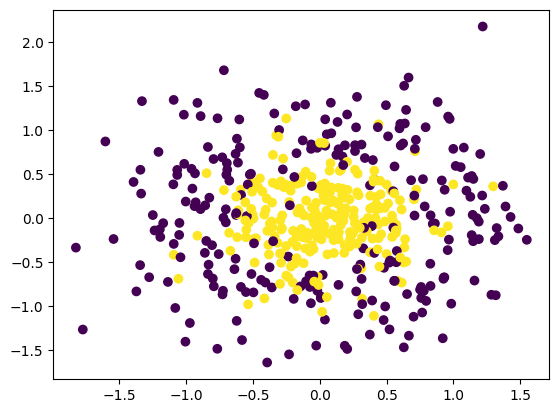

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)

In [8]:
clf=AdaBoostClassifier()

In [9]:
np.mean(cross_val_score(clf,x,y,cv=8,n_jobs=-1,verbose=True,scoring='accuracy'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   12.7s finished


0.8360855094726062

In [10]:
clf.fit(x,y)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


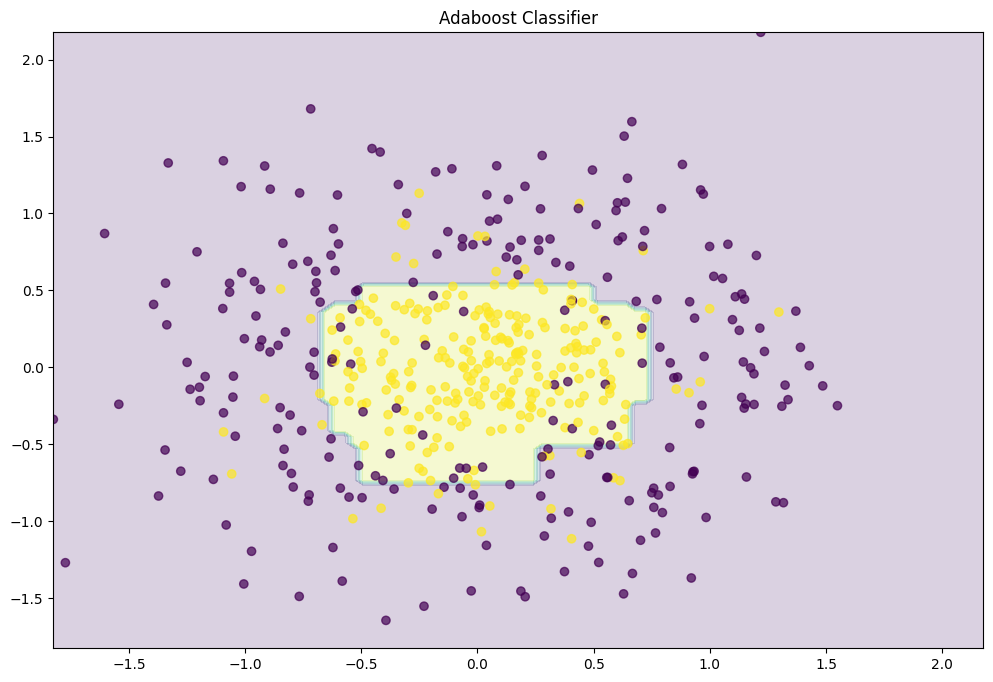

In [11]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(x.min(), x.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(clf)

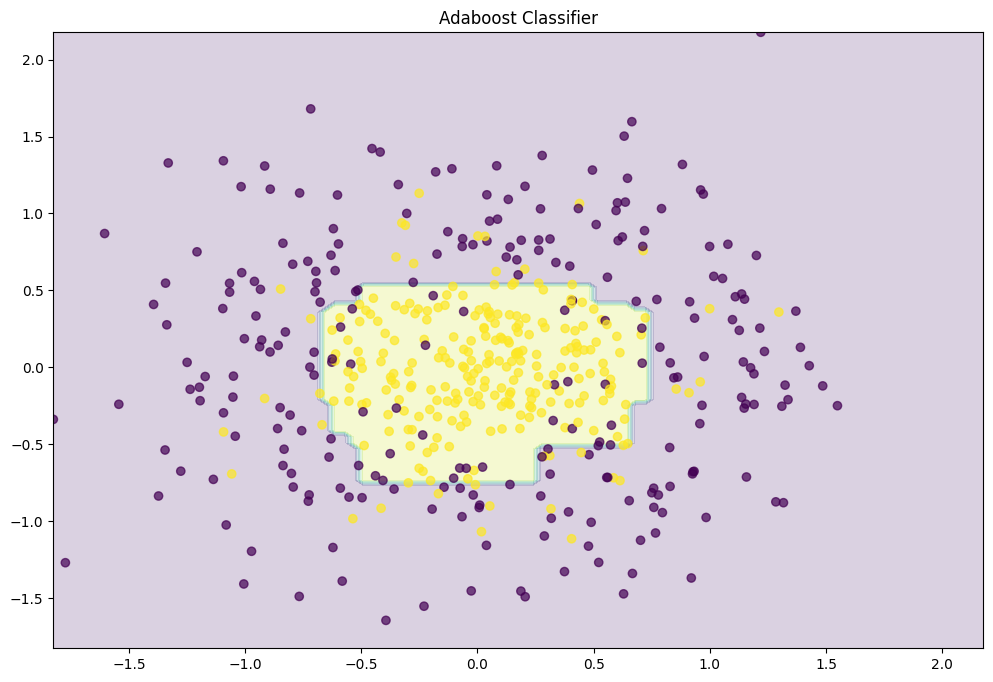

In [12]:
clf2=AdaBoostClassifier(n_estimators=100)
clf2.fit(x,y)
plot_decision_boundary(clf2)

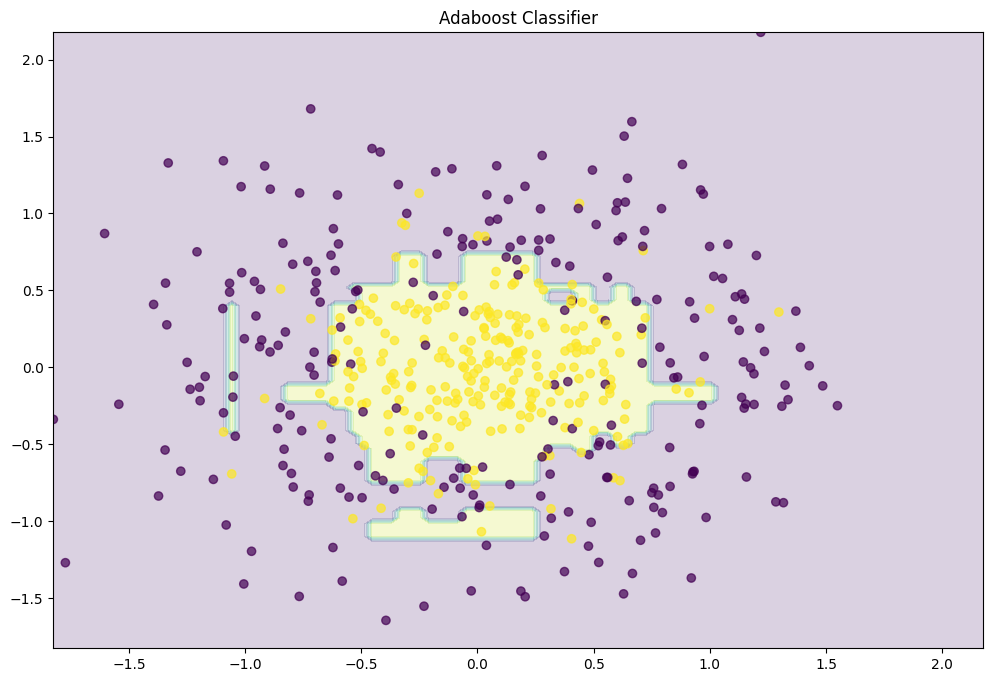

In [13]:
clf3=AdaBoostClassifier(n_estimators=1500)
clf3.fit(x,y)
plot_decision_boundary(clf3)

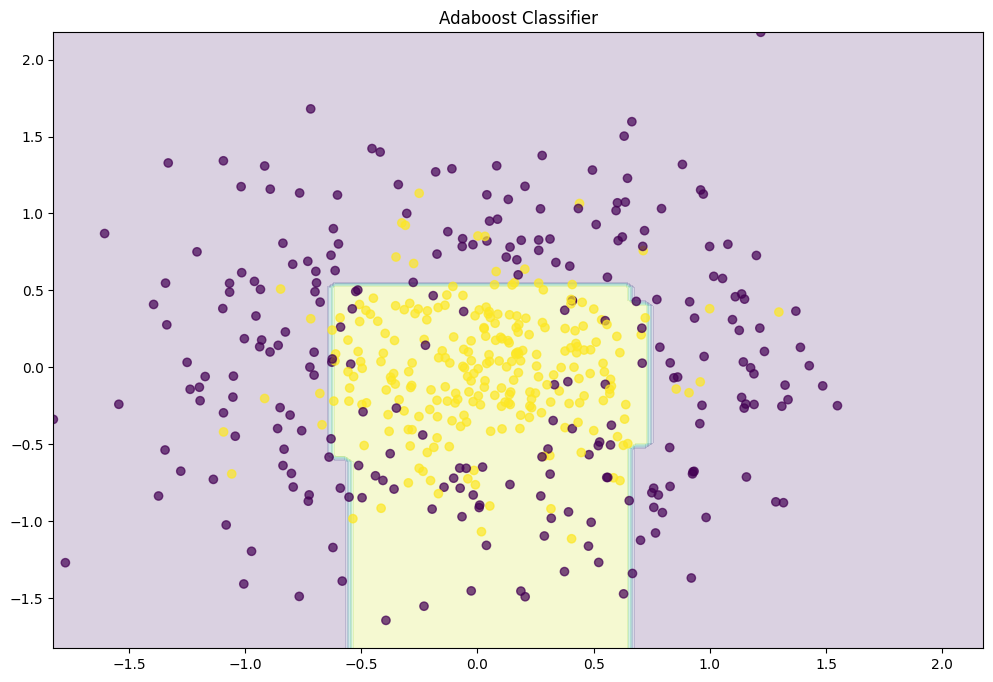

In [15]:
clf2=AdaBoostClassifier(n_estimators=1500,learning_rate=0.01)
clf2.fit(x,y)
plot_decision_boundary(clf2)

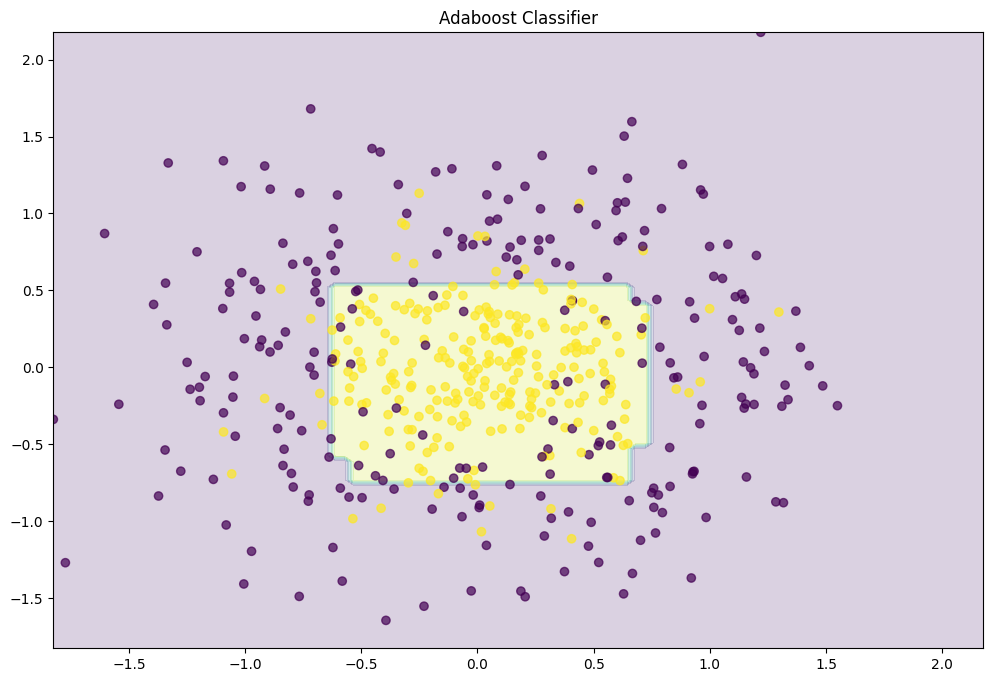

In [16]:
clf2=AdaBoostClassifier(n_estimators=1000,learning_rate=0.02)
clf2.fit(x,y)
plot_decision_boundary(clf2)

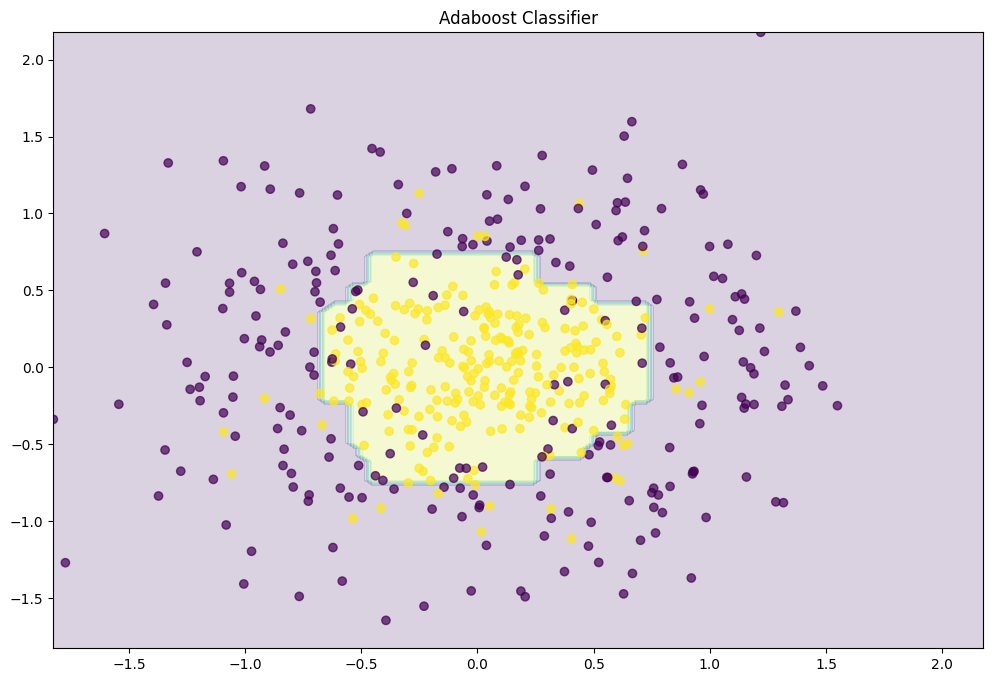

In [31]:
clf2=AdaBoostClassifier(n_estimators=500,learning_rate=0.66)
clf2.fit(x,y)
plot_decision_boundary(clf2)

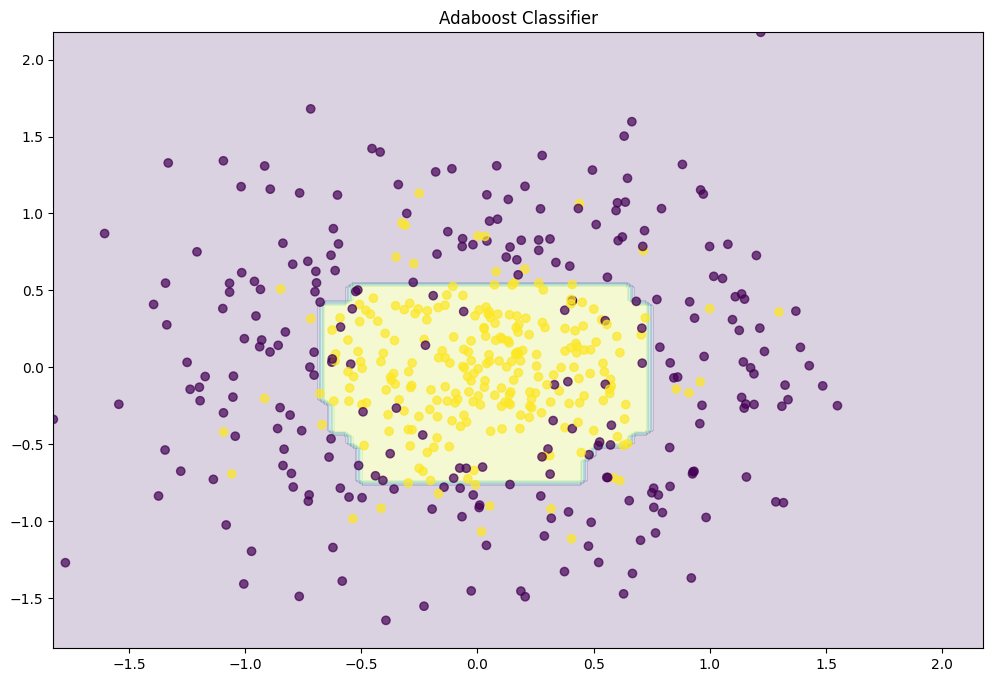

In [36]:
clf2=AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
clf2.fit(x,y)
plot_decision_boundary(clf2)

In [46]:
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500,1500],         
    'learning_rate': [0.0001,0.001,0.01, 0.1, 1.0],'algorithm':['SAMME','SAMME.R']
}

In [47]:
cv=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_grid,cv=10,n_jobs=-1,verbose=True,scoring='accuracy')
cv.fit(x,y)

Fitting 10 folds for each of 70 candidates, totalling 700 fits


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
350 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 4

,estimator,AdaBoostClassifier()
,param_grid,"{'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [0.0001, 0.001, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,10
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [49]:
cv.best_score_

0.834

In [50]:
cv.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}